In [2]:
#Importacion de Librerias
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim

<IPython.core.display.Javascript object>


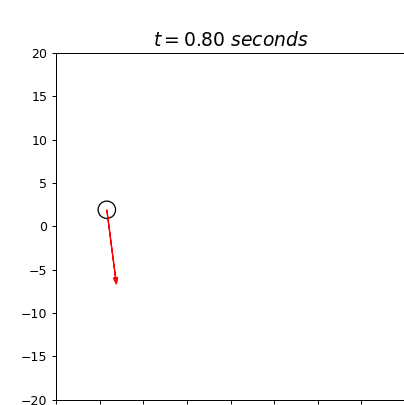

In [3]:
#1.1
%matplotlib notebook
class Particle():
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        self.dt  = t[1] - t[0]
        self.r = r0
        self.v = v0
        self.a = a0
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        self.m = m
        self.radius = radius
        self.Id = Id   
    # Method
    def Evolution(self,i):
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
    def CheckWallLimits(self,limits,dim=2):
        for i in range(dim):
            if self.v[i]<0:
                if self.r[i] + self.radius > limits[i]:
                    self.v[i] = - self.v[i]*0.9
                if self.r[i] - self.radius < - limits[i]:
                    self.v[i] = - self.v[i]*0.9
    # Setters
    def SetPosition(self,i,r):
        self.rVector[i] = r
    def SetVelocity(self,i,v):
        self.vVector[i] = v
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    def GetRPositionVector(self):
        return self.RrVector 
    def GetVelocityVector(self):
        return self.vVector
    def GetvVelocityVector(self):
        return self.vvVector
    def GetR(self):
        return self.radius
    def ReduceSize(self,factor):
        self.RrVector = np.array([self.rVector[0]]) # initial condition\
        self.vvVector = np.array([self.vVector[0]])
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
        for i in range(1,len(self.vVector)):
            if i%factor == 0:
                self.vvVector = np.vstack([self.vvVector,self.vVector[i]])
dt = 0.01
tmax = 30
t = np.arange(0,tmax+dt,dt)   

Limits = np.array([20.,20.])

def GetParticle(NParticles,Limit,Dim=2,dt=0.01):
    Particles_ = []
    for i in range(NParticles):
        x0 = np.array([-15.,5.])
        v0 = np.array([1.,0.])
        a0 = np.array([0.,-9.8])
        p = Particle(x0,v0,a0,t,1.,1.0,i)
        Particles_.append(p)  
    return Particles_

def RunSimulation(t,NParticles = 1):
    Particles = GetParticle(NParticles,Limits[0],dt=dt)
    for it in range(len(t)): # Evolucion temporal
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits(Limits)
            Particles[i].Evolution(it) 
    return Particles

Particles = RunSimulation(t,1)

def ReduceTime(t,factor):
    for p in Particles:
        p.ReduceSize(factor) 
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])     
    return np.array(Newt)

redt = ReduceTime(t,10)
len(Particles[0].GetRPositionVector())

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)

def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    x = Particles[0].GetRPositionVector()[i,0]
    y = Particles[0].GetRPositionVector()[i,1]    
    vx = Particles[0].GetvVelocityVector()[i,0]
    vy = Particles[0].GetvVelocityVector()[i,1]
    circle = plt.Circle( (x,y), Particles[0].GetR(), color='k', fill=False)
    plot = ax.add_patch(circle)
    plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

<IPython.core.display.Javascript object>


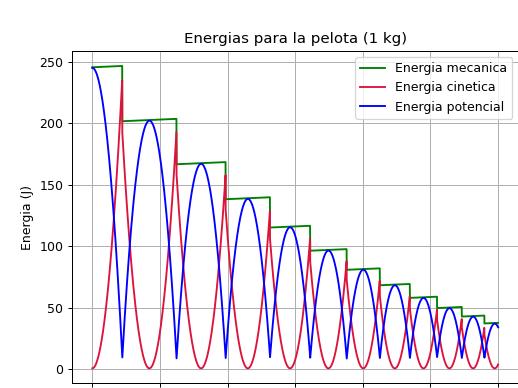

In [4]:
#1.2
Em=[]
k=[]
u=[]
for i in range(len(t)):
    vy= Particles[0].GetVelocityVector()[i,1]
    vx= Particles[0].GetVelocityVector()[i,0]
    y= Particles[0].GetPositionVector()[i,1] 
    K = 0.5*(vy**2 + vx**2)
    k.append(K)
    U= 9.8*(y+20)
    u.append(U)
    E= K + U
    Em.append(E)

plt.plot(t,Em, label ='Energia mecanica', color='green')
plt.plot(t,k, label ='Energia cinetica',color='crimson')
plt.plot(t,u, label ='Energia potencial',color='blue')
plt.legend()
plt.xlabel('tiempo (s)')
plt.ylabel('Energia (J)')
plt.title('Energias para la pelota (1 kg)')
plt.grid()

Como la pelota va disminuyendo su velocidad máxima por un factor de 0.9, implica que la energía mecánica del sistema tambien lo hace.



Por la misma analogía podemos decir que cuando la energía mecánica del sistema sea $E(t) = 0$ entonces la máxima velocidad de que la pelota pueda alcanzar también será $0$. Por tanto si analizamos la función nos damos cuenta de que para llegar a cero tiene que pasar un tiempo muy grande.



$$ \lim_{t\rightarrow \infty} E(t) = 0$$



Por lo que tiene que pasar un tiempo infinito para que la pelota estrictamente deje de rebotar, y por eso no lo podemos evidenciar en la gráfica.

<IPython.core.display.Javascript object>


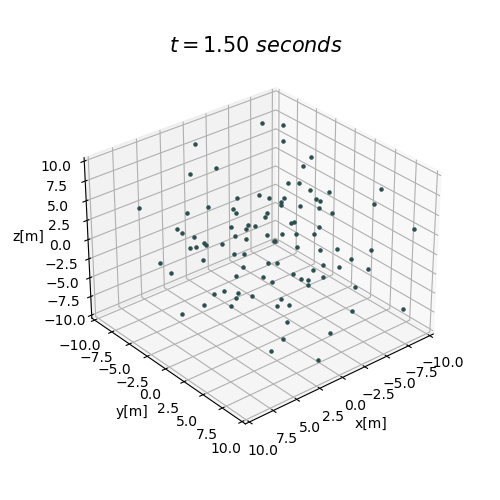

In [13]:
#2

class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
       # print(self.r)
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
    
    def CheckWallLimits(self,limits,dim=3):
        
        for i in range(dim):  
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = - self.v[i]
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = - self.v[i]
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    
    
    def GetVelocityVector(self):
        return self.vVector
     
    def GetR(self):
        return self.radius
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition

        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])

def GetParticles(NParticles,Limit,Velo,Dim=3,dt=0.1):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        x0 = np.random.uniform( -Limit+1.0, Limit-1.0, size=Dim )
        v0 = np.random.uniform( -Velo, Velo, size=Dim)
        a0 = np.zeros(Dim)
        
        p = Particle(x0,v0,a0,t,1.,1.0,i)
        
        Particles_.append(p)
        
    return Particles_

Limits = np.array([10.,10.,10.])


def RunSimulation(t,NParticles = 100, Velo = 6):
    
    Particles = GetParticles(NParticles,Limits[0],Velo = Velo,dt=dt)
    
    for it in range(len(t)): # Evolucion temporal
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits(Limits)
            Particles[i].Evolution(it)
        
        
    return Particles

Particles = RunSimulation(t,100,Velo=10)
fig = plt.figure(figsize=(5,5))
ax=fig.add_subplot(1,1,1,projection="3d",elev=30,azim=50)
redt = ReduceTime(t,10)
len(Particles[0].GetRPositionVector())

def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])
    ax.set_zlim(-Limits[2],Limits[2])
    
    ax.set_xlabel('x[m]')
    ax.set_ylabel('y[m]')
    ax.set_zlabel('z[m]')

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        z = p.GetRPositionVector()[i,2]

        ax.scatter(x,y,z,marker=".", color = "darkslategrey")

    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

# Lo unico que cambia es la forma en la que se hace la animacion y en la parte de arriba se modifica dim = 3.